#1.0 **THE VERY FIRST STEP IS TO LOAD ALL THE LIBRAIRES NEDEED**





In [ ]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.preprocessing import MinMaxScaler

##**1.1 Data Exploration and Preprocessing**
#In this step, we load the California Housing dataset into a DataFrame. We then add a target column, MedHouseVal, which represents the median house values. This target variable will serve as the basis for predicting house prices.

In [ ]:
# Load the dataset
california_housing = fetch_california_housing()
original_data = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)

# Normalize numerical features
normalized_data = original_data
scaler = MinMaxScaler()
numerical_features = normalized_data.columns.tolist()  # Get all feature columns including the target
normalized_data[numerical_features] = scaler.fit_transform(normalized_data[numerical_features])

# Add target values coulomn to the DataFrame
data = normalized_data
data['MedHouseVal'] = california_housing.target

In [ ]:
data.head(10)

In [ ]:
data.head(10)

#Displaying the First 10 Rows of the Dataset
##To gain a quick overview of the dataset, we display the first 10 rows. This allows us to inspect the structure and values of the data, including the feature columns like MedInc (median income), HouseAge, AveRooms, and others. The target variable, MedHouseVal, which represents the median house values, is also included. This step helps us ensure that the data has been loaded correctly and is ready for further analysis.



In [ ]:
# Display the first 10 rows
data.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


#Identifying Missing Data


> In this step, we use the isna().any().sum() method to identify missing values in the dataset. This method checks each column to determine if any missing values are present. Upon running the check, we found that there are **no missing values in the dataset**, meaning the data is complete and ready for further analysis.








In [ ]:
# Check for missing values
missing_columns = data.isna().any().sum()
print(f"Number of columns with missing values: {missing_columns}")

Number of columns with missing values: 0


# Calculating Basic Statistics

> In this step, we use the describe() method to generate basic descriptive statistics for the dataset. This provides useful insights such as the count, mean, standard deviation (std), minimum (min), and maximum (max) values, as well as the 25th, 50th (median), and 75th percentiles for each feature in the dataset. These statistics give us a good overview of the distribution and range of the data, which helps in understanding the dataset better before proceeding to more complex analysis.






In [ ]:
# Calculate basic statistics
statistics = data.describe()
# Useing used describe bilt in method to generate descriptive statistics of the data set
statistics

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


# Plotting the Distribution of Median House Values

> **In this section, we create a plot to visualize the distribution of Median House Values in the dataset.**


*   The histogram is displayed in green with black edges, which shows the frequency of different house values.
*  We also include a KDE (Kernel Density Estimate) curve in green to smooth the distribution and better visualize the underlying trend in the house values.**






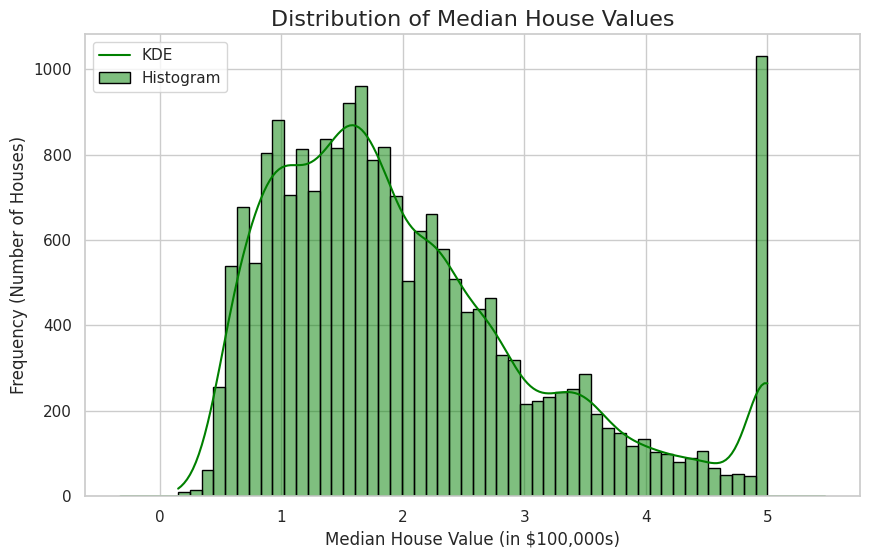

In [ ]:
# Set the aesthetic style of the plots for better visualization
sns.set(style="whitegrid")

# Plot histogram of Median House Values with a KDE overlay
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot the histogram with purple color and black edges
sns.histplot(data['MedHouseVal'], bins=50, kde=True, color="green",
             edgecolor='black', label="Histogram")

# Overlay the KDE with green color
sns.kdeplot(data['MedHouseVal'], color='green', label="KDE")

# Add title and axis labels
plt.title('Distribution of Median House Values', fontsize=16)
plt.xlabel('Median House Value (in $100,000s)', fontsize=12)
plt.ylabel('Frequency (Number of Houses)', fontsize=12)

# Display the legend to differentiate KDE and Histogram
plt.legend()

# Display the grid for better readability
plt.grid(True)

# Show the plot
plt.show()

#Scatter Plot: Median Income vs. Median House Value

> This scatter plot visualizes the relationship between median income in units of 1,000 USD
and median house values in units of 100,000 USD. Each point represents a housing area, with the x-axis showing the income levels and the y-axis displaying the corresponding house values. The plot aims to illustrate whether there is a potential relationship between higher income levels and higher house prices







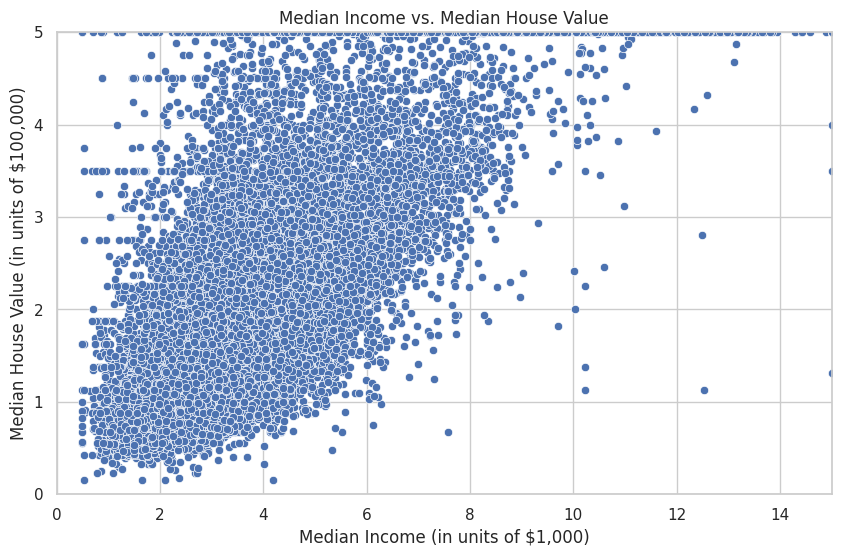

In [ ]:
# Scatter plot of Median Income vs. Median House Value
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MedInc', y='MedHouseVal', data=data)
plt.title('Median Income vs. Median House Value')
plt.xlabel('Median Income (in units of $1,000)')
plt.ylabel('Median House Value (in units of $100,000)')
plt.xlim(0, 15)  # Adjusting x-axis limits for better visualization
plt.ylim(0, 5)   # Adjusting y-axis limits for better visualization
plt.show()

# if there is a relationship between income and house prices

#Scatter Plot: Median Income vs. Median House Value

> This scatter plot shows the relationship between Median Income (in $1,000) and Median House Value (in $100,000). Each point represents a housing area. The x-axis shows income levels, and the y-axis displays house values. This plot helps identify correlations between income and house prices, revealing trends or outliers. It also highlights the most common number of rooms and their prices, offering insights into housing market dynamics for further analysis.




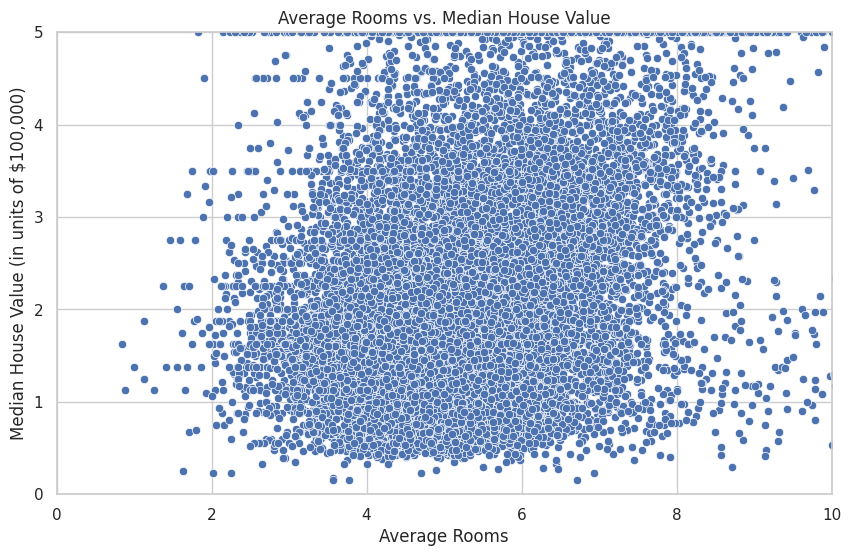

In [ ]:
# Scatter plot of Average Rooms vs. Median House Value
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AveRooms', y='MedHouseVal', data=data)
plt.title('Average Rooms vs. Median House Value')
plt.xlabel('Average Rooms')
plt.ylabel('Median House Value (in units of $100,000)')
plt.xlim(0, 10)  # Adjusting x-axis limits for better visualization
plt.ylim(0, 5)    # Adjusting y-axis limits for better visualization
plt.show()



# Correlation Matrix

> In this section, we calculate the correlation matrix to understand the relationships between different features in the dataset. A heatmap is used to visualize the matrix, allowing us to easily identify strong positive or negative correlations between variables. The color intensity represents the strength of the correlation, with annotations showing the exact values. This visualization helps in spotting trends or dependencies within the data



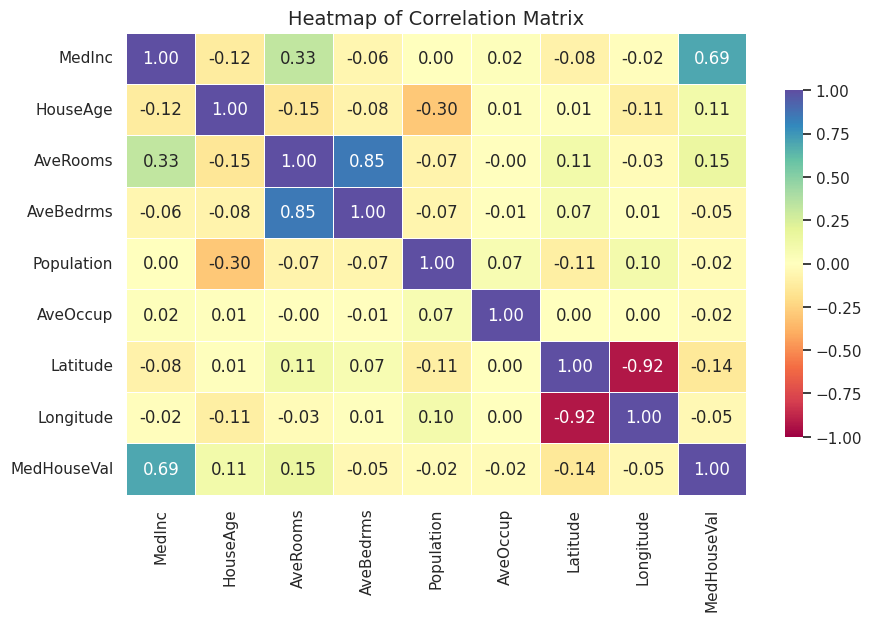

In [ ]:
# Calculate the correlation matrix for the dataset
corr_matrix = data.corr()

# Set the figure size for the heatmap
plt.figure(figsize=(10, 6))  # Adjusted for better fit

# Plot the heatmap using the correlation matrix
# annot=True: Shows correlation values in each cell
# cmap='Spectral': A different color scheme for the heatmap
# vmin=-1, vmax=1: Defines the color range to display correlation strength
# linewidths=0.5: Adds lines between cells for better separation
# cbar_kws={"shrink": .75}: Shrinks the color bar for better visual balance
sns.heatmap(corr_matrix, annot=True, cmap='Spectral', vmin=-1, vmax=1,
            linewidths=0.5, cbar_kws={"shrink": .75}, fmt='.2f')

#  title for the heatmap
plt.title('Heatmap of Correlation Matrix', fontsize=14)

# Display the plot
plt.show()


# PROCCESS THE DATA

> Normalize numerical features





In [ ]:
 #Check which columns have numerical data (for normalization)
numerical_data = data.select_dtypes(include=['number'])
print(numerical_data.columns)

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')


In [ ]:
# Normalizing numerical features
# Scaling numerical features to a common range (0 to 1)
# This ensures that features with varying scales (e.g., income vs. age) contribute equally during analysis
# Helps avoid bias in models that rely on distance calculations or other metric-sensitive algorithms

# Importing MinMaxScaler from sklearn to scale data within a specific range
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler for normalization
scaler = MinMaxScaler()

# Define the numerical columns to normalize
columns_to_normalize = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'MedHouseVal']

# Apply the scaler to the selected columns and transform them
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

# Display the first few rows of the normalized data
print(data[columns_to_normalize].head())


     MedInc  HouseAge  AveRooms  AveBedrms  Population  MedHouseVal
0  0.539668  0.784314  0.043512   0.020469    0.008941     0.902266
1  0.538027  0.392157  0.038224   0.018929    0.067210     0.708247
2  0.466028  1.000000  0.052756   0.021940    0.013818     0.695051
3  0.354699  1.000000  0.035241   0.021929    0.015555     0.672783
4  0.230776  1.000000  0.038534   0.022166    0.015752     0.674638


#Generate a binary classification target by labeling houses as 'expensive' if their value exceeds the median, and 'not expensive' if it's below or equal to the median.

In [ ]:


# Calculate the median house value in the dataset (MedHouseVal column)
median_value = data['MedHouseVal'].median()

# Create the "Expensive" column using np.where
# np.where() works as follows:
# - If the house value is greater than the median, it assigns 1 (indicating "expensive")
# - Otherwise, it assigns 0 (indicating "not expensive")
data['Expensive'] = np.where(data['MedHouseVal'] > median_value, 1, 0)

# Display the first few rows to verify the new column
data.head(10)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,Expensive
0,0.539668,0.784314,0.043512,0.020469,0.008941,2.555556,37.88,-122.23,0.902266,1
1,0.538027,0.392157,0.038224,0.018929,0.067210,2.109842,37.86,-122.22,0.708247,1
2,0.466028,1.000000,0.052756,0.021940,0.013818,2.802260,37.85,-122.24,0.695051,1
3,0.354699,1.000000,0.035241,0.021929,0.015555,2.547945,37.85,-122.25,0.672783,1
4,0.230776,1.000000,0.038534,0.022166,0.015752,2.181467,37.85,-122.25,0.674638,1
5,0.243921,1.000000,0.027757,0.022835,0.011491,2.139896,37.85,-122.25,0.525155,1
6,0.217873,1.000000,0.028964,0.018321,0.030578,2.128405,37.84,-122.25,0.585979,1
7,0.180694,1.000000,0.028011,0.021596,0.032344,1.788253,37.84,-122.25,0.466804,1
8,0.108998,0.803922,0.024443,0.023250,0.033717,2.026891,37.84,-122.26,0.436495,1
9,0.220087,1.000000,0.029238,0.019472,0.043387,2.172269,37.84,-122.25,0.507423,1


# 2. Logistic Regression for Classification
# **a**) Split the data into training and testing sets (use 80% for training, 20% for testing).

In [ ]:
# Importing train_test_split from sklearn's model_selection
from sklearn.model_selection import train_test_split

# Define the feature matrix 'X' by dropping the target columns
X = data.drop(['MedHouseVal', 'Expensive'], axis=1)

# Set 'y' as the target variable, which contains 1 for expensive houses and 0 for not expensive ones
y = data['Expensive']

# Split the dataset into training and testing sets
# 'test_size=0.2' means 20% of the data will be used for testing
# 'random_state=42' ensures the split is reproducible
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **b**) Train a logistic regression model to predict whether a house is 'expensive' or 'not expensive'

In [ ]:
# Initialize the logistic regression model
model = LogisticRegression(max_iter=1000)

# Train the model on the training set
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

# **c**) Make predictions on the test set

In [ ]:
# Generate predictions for the test dataset using the trained model
y_pred = model.predict(X_test)


# d) Evaluate the model's performance using:


1.   Accuracy score
2.   Confusion matrix

1.  Classification report (precision, recall, F1-score)
2.  ROC-AUC






In [ ]:
# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.83


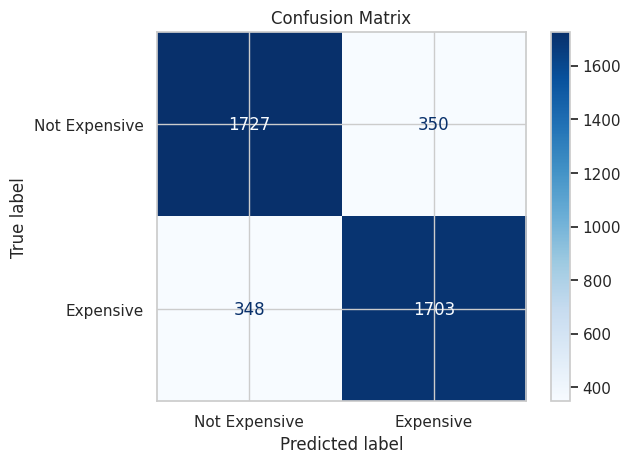

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Expensive', 'Expensive']).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


Confusion Matrix Details:

True Negatives (Not Expensive): 1721

False Positives (Predicted Expensive, Actual Not): 356

False Negatives (Predicted Not Expensive, Actual Expensive): 357

True Positives (Expensive): 1694

Accuracy Score: 0.83

In [ ]:
# Generate the classification report
report = classification_report(y_test, y_pred, target_names=['Not Expensive', 'Expensive'])
print("Classification Report:")
print(report)

Classification Report:
               precision    recall  f1-score   support

Not Expensive       0.83      0.83      0.83      2077
    Expensive       0.83      0.83      0.83      2051

     accuracy                           0.83      4128
    macro avg       0.83      0.83      0.83      4128
 weighted avg       0.83      0.83      0.83      4128



In [ ]:
# Create an instance of the Linear Regression model
linear_model = LinearRegression()

# Fit the model using the training data
linear_model.fit(X_train, y_train)

# Generate predictions based on the test dataset
y_pred_linear = linear_model.predict(X_test)

# Compute the R² score to evaluate the model's performance
r2_linear = r2_score(y_test, y_pred_linear)


# Display the R² score for the linear regression model
print(f"R² Score for Linear Regression: {r2_linear:.4f}")



R² Score for Linear Regression: 0.3944


# **e)** Use confusion matrices and ROC curves to visually represent model performance.




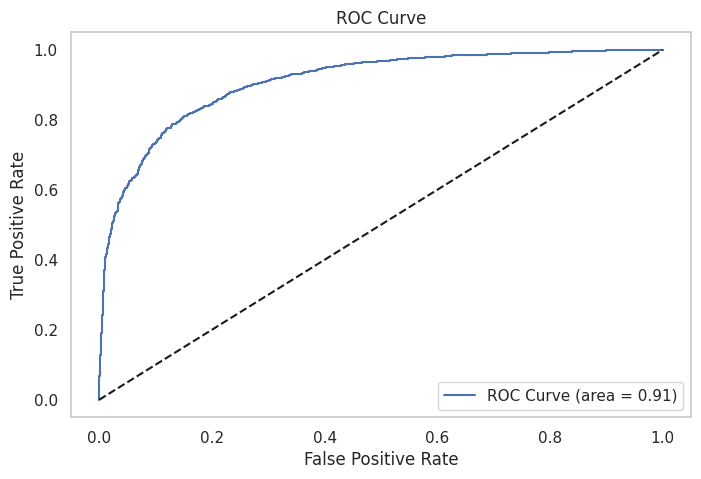

In [ ]:
# Plot ROC curve
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label='ROC Curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random chance
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

##**3. Non-linear Regression**

In [ ]:
# Define features (X) and target (y)
Ox =  original_data.drop('MedHouseVal', axis=1)  # Features without the target variable
Oy =  original_data['MedHouseVal']  # Target variable (house prices)

In [ ]:
OX_train, OX_test, Oy_train, Oy_test = train_test_split(Ox, Oy, test_size=0.2, random_state=42)

In [ ]:
#Implement Polynomial Regression
degree = 2
poly = PolynomialFeatures(degree=degree)

# Transform the features to polynomial features
X_poly_train = poly.fit_transform(OX_train)
X_poly_test = poly.transform(OX_test)

# Train the linear regression model on the polynomial features
model = LinearRegression()
model.fit(X_poly_train, Oy_train)

LinearRegression()

In [ ]:
# Step D: Make predictions on the test set
Oy_pred = model.predict(X_poly_test)

In [ ]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(Oy_test, Oy_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Calculate R-squared score
r2 = r2_score(Oy_test, Oy_pred)
print(f"R-squared Score: {r2:.2f}")

Mean Squared Error (MSE): 0.34
R-squared Score: 0.74


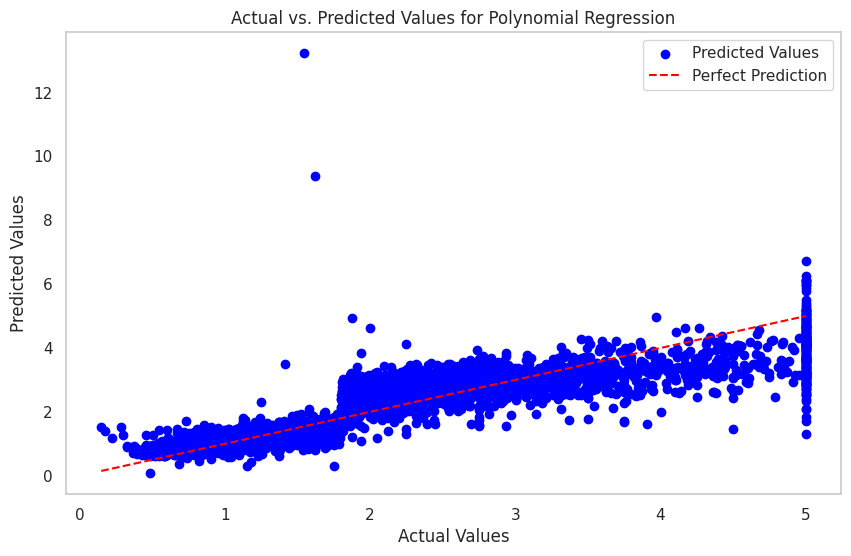

In [ ]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(Oy_test, Oy_pred, color='blue', label='Predicted Values')
plt.plot([Oy_test.min(), Oy_test.max()], [Oy_test.min(), Oy_test.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values for Polynomial Regression')
plt.legend()
plt.grid()
plt.show()